In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [2]:
pwd

'C:\\Users\\feron\\TIL6022---Project'

In [3]:
df = pd.read_csv('data\data_congestion.csv')
#Load the dataframe that has been created by combining the other data downloaded from RWS

In [4]:
#to find the traffic jams around Delft
#KopWegvakVan en KopWegvakNaar is filtered for Delft so that we find all traffic jams around Delft.
df1 = df[(df["KopWegvakVan"].str.contains("Delft") == True) | (df["KopWegvakNaar"].str.contains("Delft") == True)]
df1['FileDuur'] = df1['FileDuur'].str.replace(",", '.').astype(float) #convert string to float for calculation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
#filter out all traffic jams that were caused by accidents
# or other unavoidable events

df2 = df1[df1['Oorzaak_1'] == 'Spitsfile (geen oorzaak gemeld)']

In [6]:
pd.set_option('display.max_columns', None)
#df1.head(5)

In [7]:
df2.set_index("DatumFileBegin_TijdFileBegin", inplace=True)
df2.index = pd.to_datetime(df2.index)   #convert the index column to date_time

In [8]:
#df2 = df1.resample('M').size()               #counts the number of traffic jams per month to make a bar plot
#date_convert = df2.index.strftime("%Y-%m")   #converts the datetime into a string with year and month
#xlabels = []
#for i in date_convert:
#    xlabels.append(i)

In [9]:
#fig, ax = plt.subplots(figsize=(16,5))
#ax = df2.plot.bar()

#ax.set_xticklabels(xlabels)
#ax.set_xlabel('Date')
#ax.set_ylabel('Number of traffic jams')
#ax.set_title('Number of Traffic Jams over the months from 2020-03 to 2022-09');

In [10]:
#df3 = df1.resample('W').size() 
#df4 = df3.to_frame()

#df4['dates_converted'] = df4.index.strftime("%Y-M%m-W%W")
#df4 = df4.rename(columns={0: 'count'})

In [11]:
#fig, ax = plt.subplots(figsize=(16,5))
#ax = df4.plot(x='dates_converted', y='count', ax=ax)

#ax.set_xlabel('Date')
#ax.set_ylabel('Number of traffic jams')
#ax.set_title('Number of Traffic Jams over the weeks from 2020-03 to 2022-09');

In [12]:
#df_cap = df2.resample('W').sum()
#df_cap['dates_converted'] = df_cap.index.strftime("%Y-M%m-W%W")

In [13]:
#fig, ax = plt.subplots(figsize=(16,5))
#ax = df_cap.plot(x='dates_converted', y='FileDuur', ax=ax)

#ax.set_xlabel('Date')
#ax.set_ylabel('Lost time in [min]')
#ax.set_title('Amount of lost time due to congestion caused by capacity issues over the weeks');

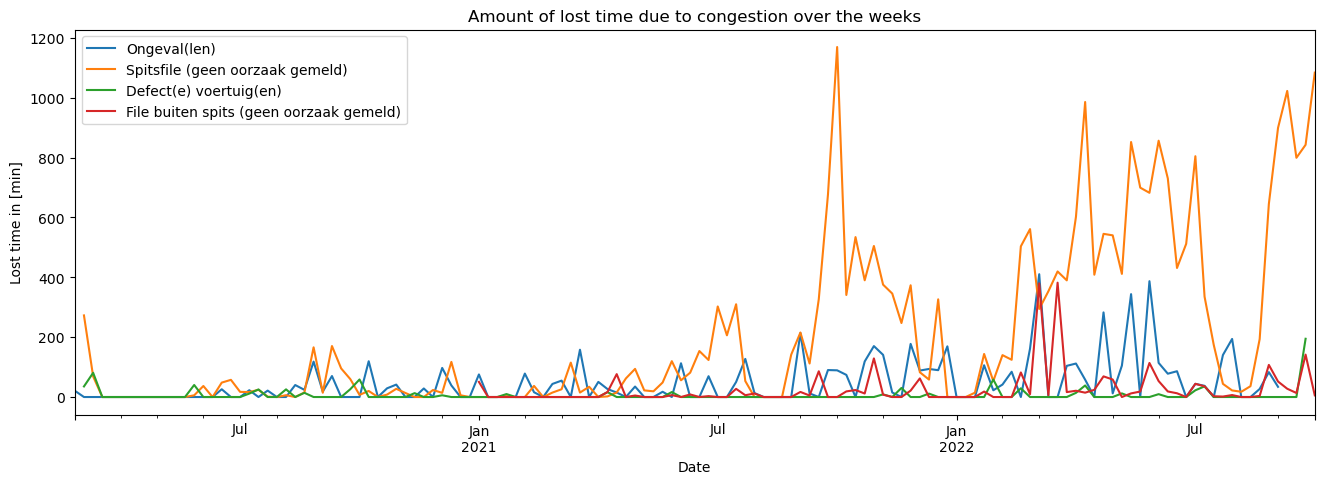

In [14]:
#First we want to know the causes of the traffic jams with their corresponding occurance
from collections import Counter
input =  df1.Oorzaak_1
c = Counter(input)
oorzaken = []
oor_count = []

#now we want to create two list with the occurance and the cause
#We chose to only look at causes that occur more or equal to 25 times, so that only significant causes are shown
for k in c.items():
    if k[1] >= 25:
        oorzaken.append(k[0])
        oor_count.append(k[1])
        
#create names for the dataframes that look like: df_'first3lettersofcause'   
names = []
for i in oorzaken:
    names.append('df_' + i[0:3].lower())

#create figure and axes for the plots
#create dataframes containing a cause each so that they can be plotted
fig, ax = plt.subplots(figsize=(16,5))
for j in range(len(names)):
    names[j] = df1[df1['Oorzaak_1'] == oorzaken[j]]
    names[j].set_index("DatumFileBegin_TijdFileBegin", inplace=True)
    names[j].index = pd.to_datetime(names[j].index)
    names[j] = names[j].resample('W').sum()
    ax = names[j].plot(y='FileDuur', label=oorzaken[j], ax=ax)

#set labels en title for the figure
ax.set_xlabel('Date')
ax.set_ylabel('Lost time in [min]')
ax.set_title('Amount of lost time due to congestion over the weeks');